# Pareto Versus Exponential Distributions

This notebook illustrates the differences between an exponential and pareto distribution.
I plot realizations from both DGP's and show the two densities in a log-log plot.

In [1]:
# Load general packages
import numpy as np
import matplotlib.pyplot as plt

## Uncomment for nicer plots ##
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('axes', axisbelow=True)

In [2]:
# Set seed
np.seed = 200

# Set parameter values
N = 500
alpha = 1.5

### Draw from truncated exponential distribution

In [3]:
# Draw from uniform
x_uni = np.random.uniform(0,1,N)

# Put through the inverse cdf of the truncated exponential
x_expo = 1 - np.log(1 - x_uni)

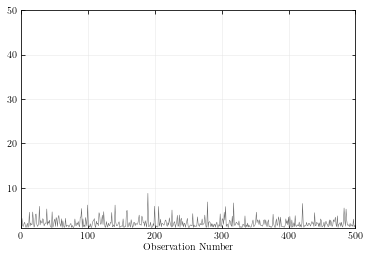

In [4]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(x_expo, color = '0.4', linewidth = 0.5)

# Plot setting
ax.set_xlabel('Observation Number')
# ax.set_ylabel('Value')
ax.set_xlim(0,len(x_expo))
ax.set_ylim(1, 50)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

# plt.savefig('../../tex/figs/exponential.pdf')

### Draw from pareto distribution

In [5]:
# Draw form uniform
x_uni2 = np.random.uniform(0,1, N)

# Put through the inverse cdf of the Pareto distribution
x_pareto = np.exp(-np.log(1-x_uni2)/alpha)

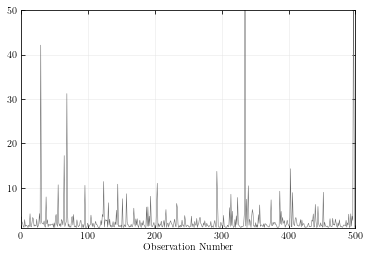

In [6]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(x_pareto, color = '0.4', linewidth = 0.5)

# Plot setting
ax.set_xlabel('Observation Number')
# ax.set_ylabel('Value')
ax.set_xlim(0,len(x_pareto))
ax.set_ylim(1,50)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../tex/figs/pareto.pdf')

### Plot fat tailed realizations at different scales

In [15]:
# Set a much larger N
N_large = 1_000_000

# Draw uniform numbers
rand = np.random.uniform(0,1, N_large)

# Seed through inverse cdf and define x values
y_vals = np.exp(-np.log(1-rand)/alpha)
x_vals = range(N_large)

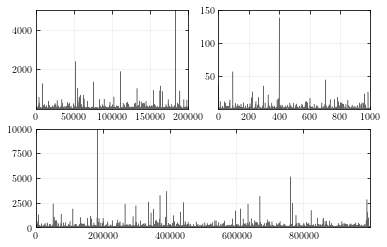

In [24]:
ax1 = plt.subplot(212)
ax1.margins(0.0)           # Default margin is 0.05, value 0 means fit
ax1.plot(x_vals, y_vals, color = '0.4', linewidth = 0.5)
ax1.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax1.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax1.set_ylim(0,10000)

ax2 = plt.subplot(221)
ax2.margins(0, 0)           # Values >0.0 zoom out
ax2.set_xlim(0,200000)
ax2.set_ylim(1,5000)
ax2.plot(x_vals, y_vals, color = '0.4', linewidth = 0.5)
ax2.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax2.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
# ax2.set_title('Zoomed In')

ax3 = plt.subplot(222)
ax3.plot(x_vals, y_vals, color = '0.4', linewidth = 0.5)
ax3.set_xlim(0,1000)
ax3.set_ylim(1,150)
ax3.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax3.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
# ax3.set_title('Zoomed Further')

plt.savefig('../../tex/figs/zoom.pdf')

### Plot the theoretical densities in a log-log plot

In [25]:
# x values
vals = np.linspace(1,1000, 100000)

# Lambda is the parameter of the exponential distribution
lambdaa = 1/alpha

# Compute density over vals
y_expo = 1/np.exp(-lambdaa)*lambdaa*np.exp(-lambdaa*vals)
y_pareto = alpha*vals**(-alpha-1)

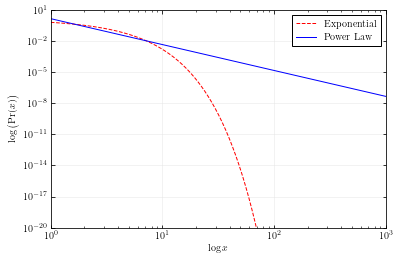

In [29]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.plot(vals,y_expo, color = 'red', linestyle ='--', zorder = 2, linewidth=1, label = 'Exponential')
ax.plot(vals,y_pareto, color = 'blue', zorder = 2, linewidth=1, label = 'Power Law')

ax.set(xscale='log', yscale = 'log')
ax.set_xlim(1,1e+3)
ax.set_ylim(1e-20,10)

ax.set_xlabel(r'$\log x$')
ax.set_ylabel(r'$\log \big(\mathrm{Pr} (x) \big)$')

ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('../../tex/figs/log_log.pdf')